In [20]:
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
# import matplotlib.colors as mcolors
import numpy as np

from scipy.interpolate import interp1d

In [21]:
source_dir = '../../data_general/processed_data/'

preprocessed_dir = '../../data_general/data_preprocessed/'

fig2_specific_data_dir = '../processed_data_for_fig2/'

save_dir = '../fig2_multipanel/'

In [22]:
dist_coord = pd.read_csv(source_dir + 'final_qc_CTD_data_interpolatedGrad.csv')
dist_coord.columns

Index(['FILE', 'SECT_ID', 'STNNBR', 'CASTNO', 'DATE', 'TIME', 'LATITUDE',
       'LONGITUDE', 'DEPTH', 'CTDPRS_DBAR', 'CTDPRS_FLAG_W', 'CTDDEPTH_METERS',
       'CTDDEPTH_FLAG_W', 'CTDTMP_ITS-90', 'CTDTMP_FLAG_W', 'CTDTMP2_ITS-90',
       'CTDTMP2_FLAG_W', 'CTDSAL_PSU', 'CTDSAL_FLAG_W', 'CTDSAL2_PSU',
       'CTDSAL2_FLAG_W', 'CTDOXY_ML/L', 'CTDOXY_FLAG_W', 'CTDOXY2_ML/L',
       'CTDOXY2_FLAG_W', 'CTDFLUOR_MG/M^3', 'CTDFLUOR_FLAG_W',
       'CTDXMISS_%TRANS', 'CTDXMISS_FLAG_W', 'PAR_UMOL/M^2/SEC', 'PAR_FLAG_W',
       'SPAR_UMOL/M^2/SEC', 'SPAR_FLAG_W', 'LINE', 'SECTION', 'SA_sal_gperkg',
       'CT_temp_its90', 'SIGMA0_kgperm3', 'CORIOLIS', 'LateralDensityGrad',
       'dist_km'],
      dtype='object')

In [23]:
### Get Distance/Latitude Conversion from Final CTD Data ###
dist_coord = pd.read_csv(source_dir + 'final_qc_CTD_data_interpolatedGrad.csv')[['SECT_ID', 'dist_km', 'LATITUDE', 'LONGITUDE']]
dist_coord['transect'] = dist_coord['SECT_ID'].str.extract(r'([A-Z]+)')[0]
dist_coord['section'] = dist_coord['SECT_ID'].str.extract(r'([A-Z]+\d)')[0]

hr_dist_coord = dist_coord[dist_coord['section'].fillna('').str.match(r'^HR\d')].dropna().drop_duplicates().sort_values(by = 'LATITUDE')
hre_dist_coord = dist_coord[dist_coord['transect'].fillna('').str.match(r'^HRE')].dropna().drop_duplicates().sort_values(by = 'LATITUDE')

hr_dist_coord['dist_ns'] = hr_dist_coord['dist_km'].max() - hr_dist_coord['dist_km']
hre_dist_coord['dist_ns'] = hre_dist_coord['dist_km'].max() - hre_dist_coord['dist_km']

In [24]:
# create interpolators for latitude based on distance along the transect
hr_distLat_interpolator = interp1d(hr_dist_coord['dist_ns'], hr_dist_coord['LATITUDE'], kind = 'linear', fill_value='extrapolate')
hre_distLat_interpolator = interp1d(hre_dist_coord['dist_ns'], hre_dist_coord['LATITUDE'], kind = 'linear', fill_value='extrapolate')

In [25]:
# read in HR grids and interpolated fluorescence, density, geostrophic velocity, and bathymetry data
hr_x = pd.read_csv(preprocessed_dir + 'interpolated_csv_files/hr_xgrid.csv')
hr_y = pd.read_csv(preprocessed_dir + 'interpolated_csv_files/hr_ygrid.csv')
hr_flu = pd.read_csv(preprocessed_dir + 'interpolated_csv_files/hr_mean_flu.csv')
hr_sigma = pd.read_csv(preprocessed_dir + 'interpolated_csv_files/hr_mean_sig.csv')
hr_bathy = pd.read_csv(preprocessed_dir + 'interpolated_csv_files/hr_bathymetry.csv')
hr_geoVel = pd.read_csv(preprocessed_dir + 'interpolated_csv_files/hr_mean_vel.csv')

In [26]:
# read in HRE grids and interpolated fluorescence, density, geostrophic velocity, and bathymetry data
hre_x = pd.read_csv(preprocessed_dir + 'interpolated_csv_files/hre_xgrid.csv')
hre_y = pd.read_csv(preprocessed_dir + 'interpolated_csv_files/hre_ygrid.csv')
hre_flu = pd.read_csv(preprocessed_dir + 'interpolated_csv_files/hre_mean_flu.csv')
hre_sigma = pd.read_csv(preprocessed_dir + 'interpolated_csv_files/hre_mean_sig.csv')
hre_bathy = pd.read_csv(preprocessed_dir + 'interpolated_csv_files/hre_bathymetry.csv')
hre_geoVel = pd.read_csv(preprocessed_dir + 'interpolated_csv_files/hre_mean_vel.csv')


(0.0, 121.0)

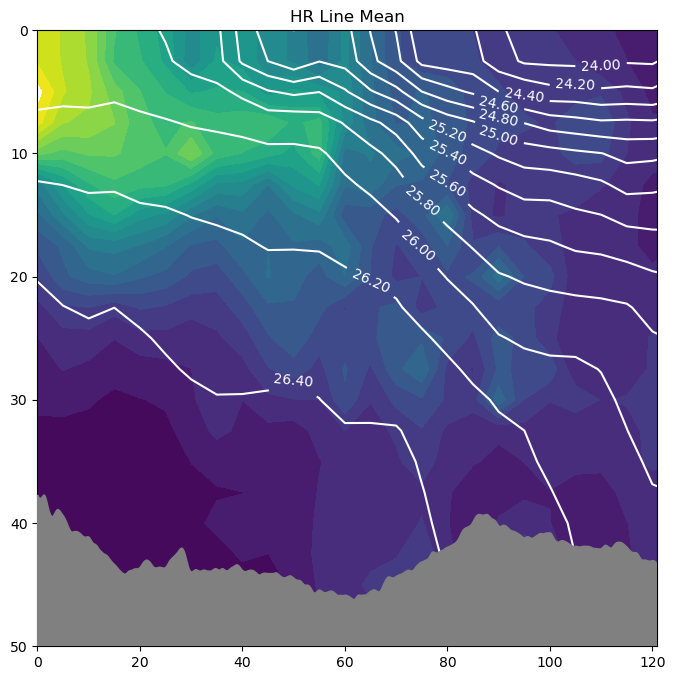

In [27]:
## plot HR Line Mean Fluorescence with density contours and bathymetry

fig = plt.figure(figsize=(8, 8))

contourf = plt.contourf(hr_x, hr_y, hr_flu, levels = np.linspace(0, 10, 21), cmap = 'viridis')
# geovelcontour = plt.contourf(hre_x, hre_y, hre_geoVel, levels = 25, cmap='jet')
sigmacontour = plt.contour(hr_x, hr_y, hr_sigma, levels = 15, colors = 'white')

plt.gca().invert_yaxis()
plt.gca().clabel(sigmacontour, inline=True, fontsize=10, fmt="%.2f", colors="white")
plt.gca().set_title('HR Line Mean')

bathy_polygon = Polygon(hr_bathy, closed=True, color = 'gray', zorder=3)
plt.gca().add_patch(bathy_polygon)

plt.ylim(50, 0)
plt.xlim(0, 121)

(50.0, 0.0)

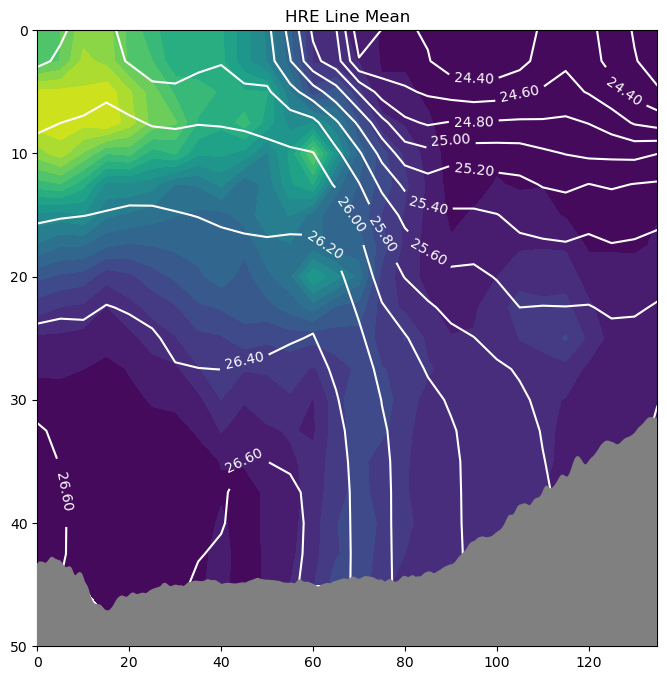

In [28]:
## plot HRE Line Mean Fluorescence with density contours and bathymetry

fig = plt.figure(figsize=(8, 8))

contourf = plt.contourf(hre_x, hre_y, hre_flu, levels = np.linspace(0, 10, 21), cmap = 'viridis')
# geovelcontour = plt.contourf(hre_x, hre_y, hre_geoVel, levels = 25, cmap='jet')
sigmacontour = plt.contour(hre_x, hre_y, hre_sigma, levels = 15, colors = 'white')

plt.gca().invert_yaxis()
plt.gca().clabel(sigmacontour, inline=True, fontsize=10, fmt="%.2f", colors="white")
plt.gca().set_title('HRE Line Mean')

bathy_polygon = Polygon(hre_bathy, closed=True, color = 'gray', zorder=3)
plt.gca().add_patch(bathy_polygon)

plt.ylim(50, 0)
# plt.xlim(0, 121)

In [29]:
## read in sediment data

sediment = pd.read_csv(preprocessed_dir + 'sed_chl.csv')
hr_sed = sediment[sediment['box_line'] == 'HR']
hr_sed['x'] = hr_sed['dist_km'].max() - hr_sed['dist_km']

hre_sed = sediment[sediment['box_line'] == 'HRE']
hre_sed['x'] = hre_sed['dist_km'].max() - hre_sed['dist_km']
hre_sed

/var/folders/8g/k7dpf2yx1v31sdbm639f5tc00000gn/T/ipykernel_38333/3595802578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_sed['x'] = hr_sed['dist_km'].max() - hr_sed['dist_km']
/var/folders/8g/k7dpf2yx1v31sdbm639f5tc00000gn/T/ipykernel_38333/3595802578.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hre_sed['x'] = hre_sed['dist_km'].max() - hre_sed['dist_km']


,section,box_line,sectionStation,sedChlMean,sedChlSd,dist_km,x
0,HRE10,HRE,10,18.366667,7.203703,134.428951,0.000000
1,HRE9,HRE,9,10.300000,0.200000,119.328726,15.100225
2,HRE8,HRE,8,15.500000,1.745470,104.440052,29.988899
3,HRE7,HRE,7,10.700000,0.500000,89.641638,44.787314
4,HRE6,HRE,6,35.033333,28.296525,74.294912,60.134039
5,HRE5,HRE,5,46.066667,21.044318,59.966017,74.462934
6,HRE4,HRE,4,43.600000,21.651097,45.000154,89.428797
7,HRE3,HRE,3,32.633333,21.217289,29.994280,104.434672
8,HRE2,HRE,2,24.946000,23.911568,15.008254,119.420697
9,HRE1,HRE,1,9.463333,1.950137,0.000000,134.428951


In [30]:
### read in ice edge data
hr_hre_ice = pd.read_csv(fig2_specific_data_dir + 'hr_hre_ice_edges.csv')

hre_ice = hr_hre_ice[hr_hre_ice['section'].fillna('').str.match(r'^HRE')]

hr_ice = hr_hre_ice[hr_hre_ice['section'].fillna('').str.match(r'^HR\d')].copy()

In [31]:
hre_ice

,section,northern_end_of_transect,ice_edge,miz_edge,southern_end_of_transect
8,HRE1,16.900275,53.639340,68.300074,135.099789
9,HRE2,0.186612,67.416811,67.416811,135.099789
10,HRE3,1.351379,82.538128,82.538128,135.099789
11,HRE4,0.000000,56.918638,71.094024,135.099789
12,HRE5,0.179712,48.574039,63.549594,135.099789
13,HRE6,0.802444,56.339233,71.397255,135.099789
14,HRE7,1.504883,41.378645,71.273020,135.099789


In [32]:
## bottle chl
hre_chl = pd.read_csv(fig2_specific_data_dir + 'bottle_chl_mean_section_hre.csv', index_col='pressure_dbar')
# need to flip column indexing
hre_cols = hre_chl.columns.astype(float)
hre_bob_cols = np.max(hre_cols) - hre_cols
# Assign the new columns back to the DataFrame
hre_chl.columns = hre_bob_cols


hr_chl = pd.read_csv(fig2_specific_data_dir + 'bottle_chl_mean_section_hr.csv',  index_col='pressure_dbar')
# need to flip column indexing
hr_cols = hr_chl.columns.astype(float)
hr_bob_cols = np.max(hr_cols) - hr_cols
# Assign the new columns back to the DataFrame
hr_chl.columns = hr_bob_cols


In [33]:
## Set up meshgrid
hre_chl_x_flat = hre_chl.columns.values.astype('float')
hre_chl_y_flat = hre_chl.index.values.astype('float')

hre_chl_x, hre_chl_y = np.meshgrid(hre_chl_x_flat, hre_chl_y_flat)

In [34]:
hre_chl_x

array([[140., 135., 130., ...,  10.,   5.,   0.],
       [140., 135., 130., ...,  10.,   5.,   0.],
       [140., 135., 130., ...,  10.,   5.,   0.],
       ...,
       [140., 135., 130., ...,  10.,   5.,   0.],
       [140., 135., 130., ...,  10.,   5.,   0.],
       [140., 135., 130., ...,  10.,   5.,   0.]])

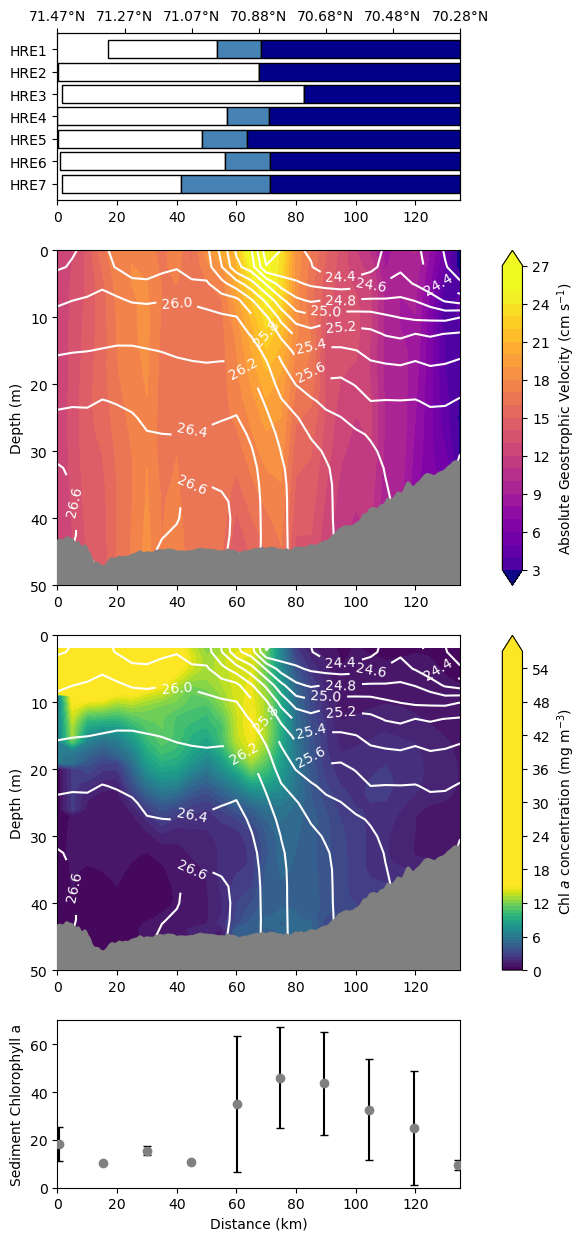

In [35]:
# Create the figure and axes with a 3x2 grid
fig = plt.figure(figsize=(6, 15))
gs = fig.add_gridspec(4, 2, width_ratios=[10, 0.5], height_ratios=[1.5, 3, 3, 1.5], hspace=0.2)

# Create the axes for the subplots
ax0 = fig.add_subplot(gs[0, 0])  # Ice Edge Plot
ax1 = fig.add_subplot(gs[1, 0])  # Geostrophic Velocity Plot
ax2 = fig.add_subplot(gs[2, 0])  # Chl a Plot
ax3 = fig.add_subplot(gs[3, 0])  # Sed Chl a Plot

# Create the axes for the colorbars
cbar_ax1 = fig.add_subplot(gs[1, 1])  # Colorbar for upper contour plot (geostrophic velocity)
cbar_ax2 = fig.add_subplot(gs[2, 1])  # Colorbar for lower contour plot (Chl a)

## Top plot - ice edges
# Loop through each row of the dataframe to plot the broken bars
for index, row in hre_ice.iterrows():
    # Get values for plotting
    section = row['section']
    northern_end = row['northern_end_of_transect']
    ice_edge = row['ice_edge']
    miz_edge = row['miz_edge']
    southern_end = row['southern_end_of_transect']
    
    # Plot the first segment (from northern_end to ice_edge, white)
    ax0.barh(section, ice_edge - northern_end, left=northern_end, color='white', edgecolor='black')
    
    # Plot the second segment (from ice_edge to miz_edge, steelblue)
    ax0.barh(section, miz_edge - ice_edge, left=ice_edge, color='steelblue', edgecolor='black')
    
    # Plot the third segment (from miz_edge to southern_end, dark blue)
    ax0.barh(section, southern_end - miz_edge, left=miz_edge, color='darkblue', edgecolor='black')
ax0.invert_yaxis()

## Add Latitude Axis to top of ice plot
axLat = ax0.twiny()
dist_ticks = np.linspace(0, 135, 7)
lat_labels = hre_distLat_interpolator(dist_ticks)
# Set ticks and labels
axLat.set_xticks(dist_ticks)
axLat.set_xticklabels([f"{lat:.2f}°N" for lat in lat_labels])

## Geostrophic Velocity Contour Plot
geovelcontour = ax1.contourf(hre_x, hre_y, hre_geoVel, levels = 25, cmap='plasma',
                             vmin = 0, vmax=25, extend='both')
sigmacontour = ax1.contour(hre_x, hre_y, hre_sigma, levels = 15, colors = 'white')
ax1.clabel(sigmacontour, inline=True, colors = 'white') #, fontsize=10, fmt="%.2f", colors="white")

# AX1 Bathymetry and axes
bathy_polygon1 = Polygon(hre_bathy, closed=True, color = 'gray', zorder=3)
ax1.add_patch(bathy_polygon1)
ax1.set_ylim(0, 50)
ax1.invert_yaxis()
ax1.set_ylabel('Depth (m)')
geovel_cbar = fig.colorbar(geovelcontour, cax=cbar_ax1, orientation='vertical', label=r'Absolute Geostrophic Velocity (cm s$^{-1}$)')


# Chloropyhll Contour Plot
chlcontourf = ax2.contourf(hre_chl_x,
                           hre_chl_y,
                           hre_chl,
                           vmin = 0, 
                           vmax = 15,
                           levels = 101,
                           extend='max',
                           cmap = 'viridis')
sigmacontour = ax2.contour(hre_x, hre_y, hre_sigma, levels = 15, colors = 'white')
ax2.clabel(sigmacontour, inline=True, colors = 'white') #, fontsize=10, fmt="%.2f", colors='white',

# AX2 Bathymetry and axes
bathy_polygon2 = Polygon(hre_bathy, closed=True, color = 'gray', zorder=3)
ax2.add_patch(bathy_polygon2)
ax2.set_ylim(0, 50)
ax2.invert_yaxis()
ax2.set_ylabel('Depth (m)')
chl_cbar = fig.colorbar(chlcontourf, cax=cbar_ax2, orientation='vertical', label=r'Chl $\mathit{a}$ concentration (mg m$^{-3}$)')

# Sediment Chart at bottom
# Jitter the edge points inward slightly
x_vals = hre_sed['x'].copy()
x_vals.loc[x_vals <= 0] += 0.5
# x_vals.loc[x_vals >= 120] -= 2

ax3.scatter(x_vals, hre_sed['sedChlMean'], color='gray', label='Mean', zorder=3)
ax3.errorbar(x_vals, hre_sed['sedChlMean'], yerr=hre_sed['sedChlSd'], fmt='none',
             ecolor='black', capsize=3, zorder=2)
# Bar Chart at bottom
# ax3.bar(hre_sed['x'], hre_sed['sedChlMean'], width=10, color='gray', label='Mean')
# ax3.errorbar(hre_sed['x'], hre_sed['sedChlMean'], yerr=hre_sed['sedChlSd'], fmt='none', ecolor='black', capsize=3)
ax3.set_ylim(0, 70)

# Axis labels and title
ax3.set_xlabel('Distance (km)')
ax3.set_ylabel('Sediment Chlorophyll a')
ax3.set_ylim(0, 70)


ax0.set_xlim(0, 135)
ax1.set_xlim(0, 135)
ax2.set_xlim(0, 135)
ax3.set_xlim(0, 135)

# plt.tight_layout()
plt.savefig(save_dir + 'hre_figure2.png', bbox_inches = 'tight', transparent = True)
plt.show()


In [36]:
## Set up meshgrid
hr_chl_x_flat = hr_chl.columns.values.astype('float')
hr_chl_y_flat = hr_chl.index.values.astype('float')

hr_chl_x, hr_chl_y = np.meshgrid(hr_chl_x_flat, hr_chl_y_flat)

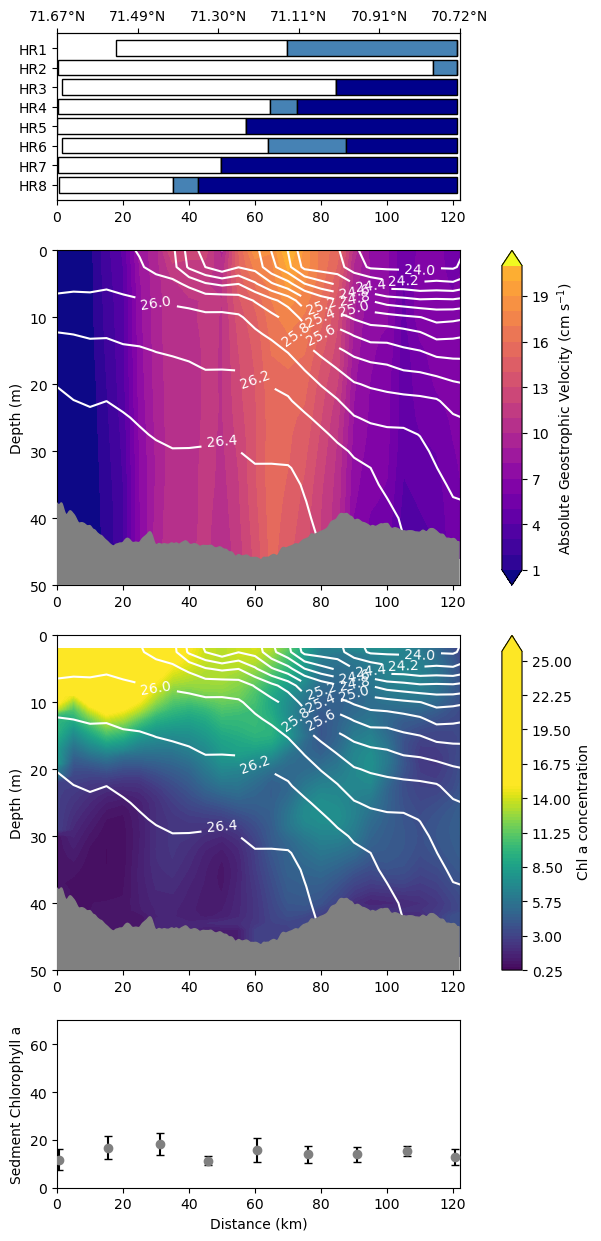

In [37]:
# Create the figure and axes with a 3x2 grid
fig = plt.figure(figsize=(6, 15))
gs = fig.add_gridspec(4, 2, width_ratios=[10, 0.5], height_ratios=[1.5, 3, 3, 1.5], hspace=0.2)

# Create the axes for the subplots
ax0 = fig.add_subplot(gs[0, 0])  # Ice Edge Plot
ax1 = fig.add_subplot(gs[1, 0])  # Geostrophic Velocity Plot
ax2 = fig.add_subplot(gs[2, 0])  # Chl a Plot
ax3 = fig.add_subplot(gs[3, 0])  # Sed Chl a Plot

# Create the axes for the colorbars
cbar_ax1 = fig.add_subplot(gs[1, 1])  # Colorbar for upper contour plot
cbar_ax2 = fig.add_subplot(gs[2, 1])  # Colorbar for lower contour plot

## Ice Edge Plot
# Loop through each row of the dataframe to plot the broken bars
for index, row in hr_ice.iterrows():
    # Get values for plotting
    section = row['section']
    northern_end = row['northern_end_of_transect']
    ice_edge = row['ice_edge']
    miz_edge = row['miz_edge']
    southern_end = row['southern_end_of_transect']
    
    # Plot the first segment (from northern_end to ice_edge, white)
    ax0.barh(section, ice_edge - northern_end, left=northern_end, color='white', edgecolor='black')
    
    # Plot the second segment (from ice_edge to miz_edge, steelblue)
    ax0.barh(section, miz_edge - ice_edge, left=ice_edge, color='steelblue', edgecolor='black')
    
    # Plot the third segment (from miz_edge to southern_end, dark blue)
    ax0.barh(section, southern_end - miz_edge, left=miz_edge, color='darkblue', edgecolor='black')
ax0.invert_yaxis()

## Add Latitude Axis to top of ice plot
axLat = ax0.twiny()
dist_ticks = np.linspace(0, 120, 6)
lat_labels = hr_distLat_interpolator(dist_ticks)
# Set ticks and labels
axLat.set_xticks(dist_ticks)
axLat.set_xticklabels([f"{lat:.2f}°N" for lat in lat_labels])


# Geostrophic Velocity Contour Plot
geovelcontour = ax1.contourf(hr_x, hr_y, hr_geoVel, levels = 25, cmap='plasma',
                             vmin = 0, vmax=25, extend='both')
sigmacontour = ax1.contour(hr_x, hr_y, hr_sigma, levels = 15, colors = 'white')
ax1.clabel(sigmacontour, inline=True, colors = 'white' )#, fmt="%.2f", colors='white')

# Geostrophic Velocity Color bar
geovel_cbar = fig.colorbar(geovelcontour, cax=cbar_ax1, orientation='vertical', label=r'Absolute Geostrophic Velocity (cm s$^{-1}$)')

# Upper Contour Plot Bathymetry and axes
bathy_polygon1 = Polygon(hr_bathy, closed=True, color = 'gray', zorder=3)
ax1.add_patch(bathy_polygon1)
ax1.set_ylim(0, 50)
ax1.invert_yaxis()
ax1.set_ylabel('Depth (m)')


# Chloropyhll Contour Plot
chlcontourf = ax2.contourf(hr_chl_x,
                           hr_chl_y,
                           hr_chl,
                           vmin = 0, 
                           vmax = 15,
                           levels = 101,
                           extend='max',
                           cmap = 'viridis')
sigmacontour = ax2.contour(hr_x, hr_y, hr_sigma, levels = 15, colors = 'white')
ax2.clabel(sigmacontour, inline=True, colors = 'white' ) #, fontsize=10, fmt="%.2f", colors="white")

# Chl Colorbar
chl_cbar = fig.colorbar(chlcontourf, cax=cbar_ax2, orientation='vertical', label='Chl a concentration')

# Lower Contour Plot Bathymetry and axes
bathy_polygon2 = Polygon(hr_bathy, closed=True, color = 'gray', zorder=3)
ax2.add_patch(bathy_polygon2)
ax2.set_ylim(0, 50)
ax2.invert_yaxis()
ax2.set_ylabel('Depth (m)')
# Sediment Chart at bottom
# Jitter the edge points inward slightly
x_vals = hr_sed['x'].copy()
x_vals.loc[x_vals <= 0] += 0.5
# x_vals.loc[x_vals >= 120] -= 2


## Sediment Chart at bottom
ax3.scatter(x_vals, hr_sed['sedChlMean'], color='gray', label='Mean', zorder=3)
ax3.errorbar(x_vals, hr_sed['sedChlMean'], yerr=hr_sed['sedChlSd'], fmt='none',
             ecolor='black', capsize=3, zorder=2)
# ax3.bar(hr_sed['x'], hr_sed['sedChlMean'], width=10, color='gray', label='Mean')
# ax3.errorbar(hr_sed['x'], hr_sed['sedChlMean'], yerr=hr_sed['sedChlSd'], fmt='none', ecolor='black', capsize=3)
ax3.set_ylim(0, 70)

# Axis labels and title
ax3.set_xlabel('Distance (km)')
ax3.set_ylabel('Sedment Chlorophyll a')


ax0.set_xlim(0, 122)
ax1.set_xlim(0, 122)
ax2.set_xlim(0, 122)
ax3.set_xlim(0, 122)

# plt.tight_layout()
plt.savefig(save_dir + 'hr_figure2.png', bbox_inches = 'tight', transparent = True)
plt.show()

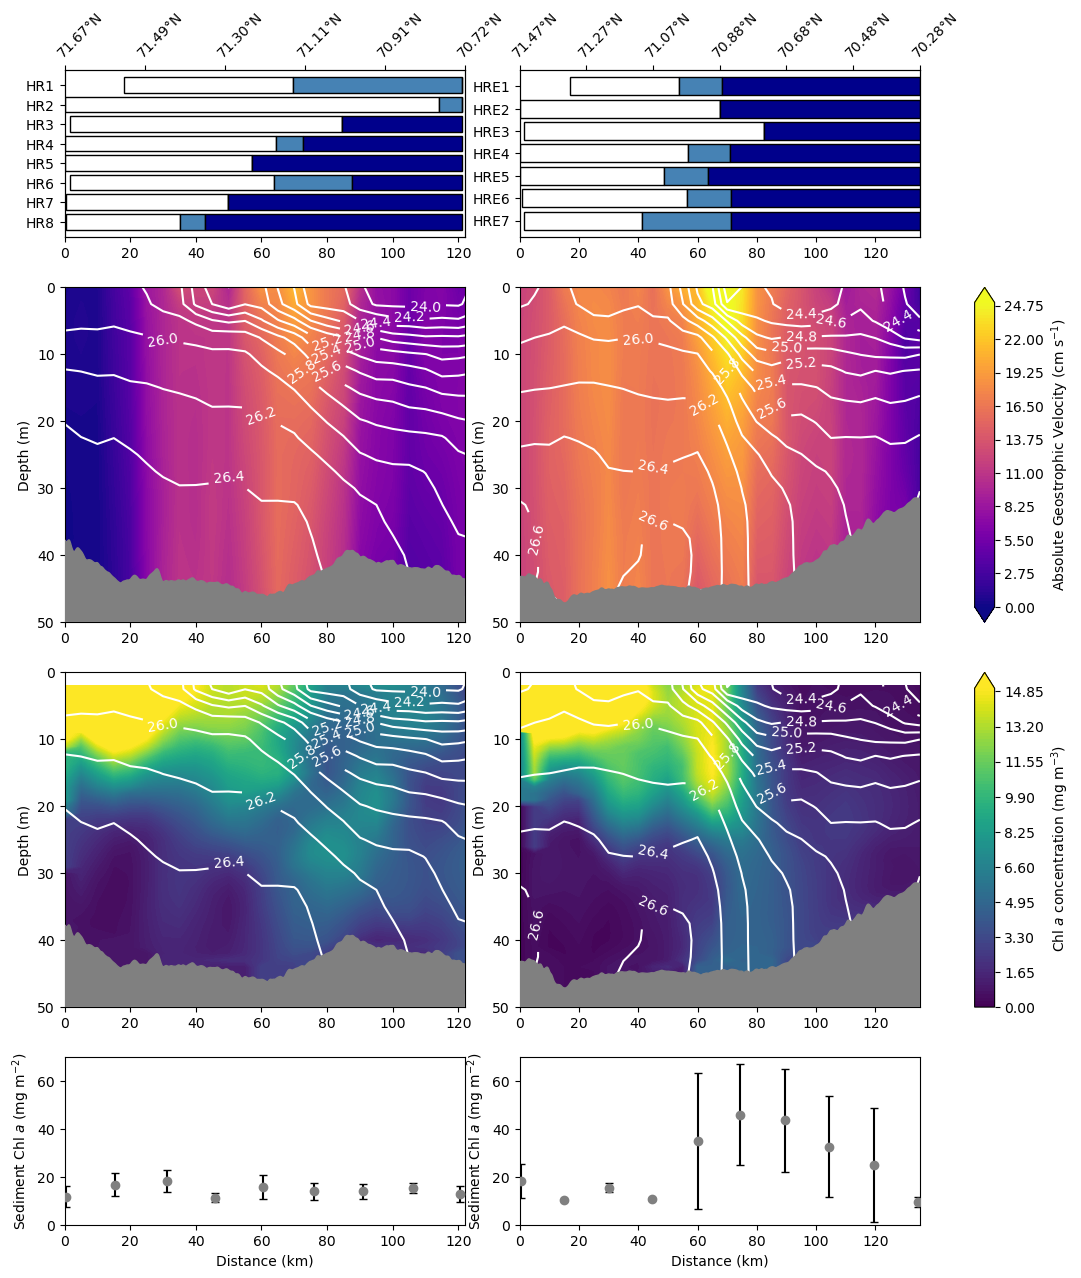

In [38]:
#### Lets Make One Big Plot with Shared Axes ####
fig = plt.figure(figsize=(12, 15))
gs = fig.add_gridspec(4, 3, width_ratios=[10, 10, 0.5], height_ratios=[1.5, 3, 3, 1.5], hspace=0.2)

### HR Plot First - Panels [0,0] HR Ice, [1,0] HR Chl a, [2,0] HR GeoVel, [3,0] Hr Sed
ax0 = fig.add_subplot(gs[0, 0]) # hrIce
ax1 = fig.add_subplot(gs[1, 0]) # hrGeo
ax2 = fig.add_subplot(gs[2, 0]) # hrChl
ax3 = fig.add_subplot(gs[3, 0]) # hrSed

# HR Latitude Axis
axLat_hr = ax0.twiny()
hr_dist_ticks = np.linspace(0, 120, 6)
hr_lat_labels = hr_distLat_interpolator(hr_dist_ticks)
axLat_hr.set_xticks(hr_dist_ticks)
axLat_hr.set_xticklabels([f"{lat:.2f}°N" for lat in hr_lat_labels])
plt.setp(axLat_hr.get_xticklabels(), rotation=45, ha='left', rotation_mode='anchor')

## Set HR Axis Limits
ax0.set_xlim(0, 122)
ax1.set_xlim(0, 122)
ax2.set_xlim(0, 122)
ax3.set_xlim(0, 122)

### HRE Plot Second Column - Panels [0,1] HR Ice, [1,1] HR Chl a, [2,1] HR GeoVel, [3,1] Hr Sed
ax4 = fig.add_subplot(gs[0, 1]) # hreIce
ax5 = fig.add_subplot(gs[1, 1]) # hreGeo
ax6 = fig.add_subplot(gs[2, 1]) # hreChl
ax7 = fig.add_subplot(gs[3, 1]) # hreSed

# HRE Latitude Axis
axLat_hre = ax4.twiny()
hre_dist_ticks = np.linspace(0, 135, 7)
hre_lat_labels = hre_distLat_interpolator(hre_dist_ticks)
axLat_hre.set_xticks(hre_dist_ticks)
axLat_hre.set_xticklabels([f"{lat:.2f}°N" for lat in hre_lat_labels])
plt.setp(axLat_hre.get_xticklabels(), rotation=45, ha='left', rotation_mode='anchor')

## Set HRE Axis Limits
ax4.set_xlim(0, 135)
ax5.set_xlim(0, 135)
ax6.set_xlim(0, 135)
ax7.set_xlim(0, 135)

# Create the axes for the colorbars
cbar_ax1 = fig.add_subplot(gs[1, 2])  # Geovel Colorbar
cbar_ax2 = fig.add_subplot(gs[2, 2])  # Chl colorbar

## HR Ice Plot - ax0
# Loop through each row of the dataframe to plot the broken bars
for index, row in hr_ice.iterrows():
    # Get values for plotting
    section = row['section']
    northern_end = row['northern_end_of_transect']
    ice_edge = row['ice_edge']
    miz_edge = row['miz_edge']
    southern_end = row['southern_end_of_transect']
    
    # Plot the first segment (from northern_end to ice_edge, white)
    ax0.barh(section, ice_edge - northern_end, left=northern_end, color='white', edgecolor='black')
    
    # Plot the second segment (from ice_edge to miz_edge, steelblue)
    ax0.barh(section, miz_edge - ice_edge, left=ice_edge, color='steelblue', edgecolor='black')
    
    # Plot the third segment (from miz_edge to southern_end, dark blue)
    ax0.barh(section, southern_end - miz_edge, left=miz_edge, color='darkblue', edgecolor='black')
ax0.invert_yaxis()

## HRE Ice Plot - ax4
# Loop through each row of the dataframe to plot the broken bars
for index, row in hre_ice.iterrows():
    # Get values for plotting
    section = row['section']
    northern_end = row['northern_end_of_transect']
    ice_edge = row['ice_edge']
    miz_edge = row['miz_edge']
    southern_end = row['southern_end_of_transect']
    
    # Plot the first segment (from northern_end to ice_edge, white)
    ax4.barh(section, ice_edge - northern_end, left=northern_end, color='white', edgecolor='black')
    
    # Plot the second segment (from ice_edge to miz_edge, steelblue)
    ax4.barh(section, miz_edge - ice_edge, left=ice_edge, color='steelblue', edgecolor='black')
    
    # Plot the third segment (from miz_edge to southern_end, dark blue)
    ax4.barh(section, southern_end - miz_edge, left=miz_edge, color='darkblue', edgecolor='black')
ax4.invert_yaxis()


### SHARED ABS GEOSTROPHIC VELOCITY COLORBAR PARAMETERS ####
geovel_levels = np.linspace(0, 25, 101)
geovel_cmap = 'plasma'
geovel_vmin, geovel_vmax = 0, 25


## HR Geostrophic Velocity Plot - ax1
ax1.contourf(hr_x,
             hr_y,
             hr_geoVel,
             levels = geovel_levels,
             cmap = geovel_cmap,
             extend='both')
sigmacontour = ax1.contour(hr_x, hr_y, hr_sigma, levels = 15, colors = 'white')
ax1.clabel(sigmacontour, inline=True, colors = 'white' )#, fmt="%.2f", colors='white')

## ax1 Bathymetry and Axis Modifications
ax1.add_patch(Polygon(hr_bathy, closed=True, color = 'gray', zorder=3))
ax1.set_ylim(0, 50)
ax1.invert_yaxis()
ax1.set_ylabel('Depth (m)')

## HRE Geostrophic Velocity Plot - ax5
geovelcontour = ax5.contourf(hre_x,
                             hre_y,
                             hre_geoVel,
                             levels = geovel_levels,
                             cmap = geovel_cmap,
                             extend='both')
sigmacontour = ax5.contour(hre_x, hre_y, hre_sigma, levels = 15, colors = 'white')
ax5.clabel(sigmacontour, inline=True, colors = 'white' )#, fmt="%.2f", colors='white')

## ax5 Bathymetry and Axis Modifications
ax5.add_patch(Polygon(hre_bathy, closed=True, color = 'gray', zorder=3))
ax5.set_ylim(0, 50)
ax5.invert_yaxis()
ax5.set_ylabel('Depth (m)')

## Geostrophic Velocity Colorbar
geovel_cbar = fig.colorbar(geovelcontour, cax=cbar_ax1, orientation='vertical', label='Absolute Geostrophic Velocity (cm s$^{-1}$)')


### SHARED CHLOROPHYLL COLORBAR PARAMETERS ####
chl_levels = np.linspace(0, 15, 101)
chl_cmap = 'viridis'
chl_vmin, chl_vmax = 0, 15

# HR Chl Plot - ax2
ax2.contourf(hr_chl_x,
             hr_chl_y,
             hr_chl,
             levels = chl_levels,
             cmap = chl_cmap,
             extend='max')
sigmacontour = ax2.contour(hr_x, hr_y, hr_sigma, levels = 15, colors = 'white')
ax2.clabel(sigmacontour, inline=True, colors = 'white' ) #, fontsize=10, fmt="%.2f", colors="white")

## ax2 Bathymetry and Axis Modifications
ax2.add_patch(Polygon(hr_bathy, closed=True, color = 'gray', zorder=3))
ax2.set_ylim(0, 50)
ax2.invert_yaxis()
ax2.set_ylabel('Depth (m)')

# HRE Chlorophyll Plot - ax6
hre_chlcontourf = ax6.contourf(hre_chl_x,
                               hre_chl_y,
                               hre_chl,
                               levels = chl_levels,
                               cmap = chl_cmap,
                               extend='max')
sigmacontour = ax6.contour(hre_x, hre_y, hre_sigma, levels = 15, colors = 'white')
ax6.clabel(sigmacontour, inline=True, colors = 'white' ) #, fontsize=10, fmt="%.2f", colors="white")

## ax6 Bathymetry and Axis Modifications
ax6.add_patch(Polygon(hre_bathy, closed=True, color = 'gray', zorder=3))
ax6.set_ylim(0, 50)
ax6.invert_yaxis()
ax6.set_ylabel('Depth (m)')

# Chl Colorbar (FOR BOTH HR AND HRE - Currently pulls colorbar from HRE contour- but lims are the same)
# cbar1 = fig.colorbar(chlcontourf, cax=cbar_ax1, orientation='vertical', label='Chl a concentration')
chl_cbar = fig.colorbar(hre_chlcontourf, cax=cbar_ax2, orientation='vertical', label=r'Chl $\mathit{a}$ concentration (mg m$^{-3}$)')


## HR Sediment Chl Plot - ax3
# Jitter the edge points inward slightly
x_vals = hr_sed['x'].copy()
x_vals.loc[x_vals <= 0] += 0.5
# PLot the Points
ax3.scatter(x_vals, hr_sed['sedChlMean'], color='gray', label='Mean', zorder=3)
ax3.errorbar(x_vals, hr_sed['sedChlMean'], yerr=hr_sed['sedChlSd'], fmt='none',
             ecolor='black', capsize=3, zorder=2)

# ax3 Axis Modifications
ax3.set_ylim(0, 70)
ax3.set_xlabel('Distance (km)')
# ax3.set_ylabel('Sedment Chlorophyll a')
ax3.set_ylabel(r'Sediment Chl $\mathit{a}$ (mg m$^{-2}$)')

## HRE Sediment Chl Plot - ax7
# Jitter the edge points inward slightly
x_vals = hre_sed['x'].copy()
x_vals.loc[x_vals <= 0] += 0.5
# Plot the Points
ax7.scatter(x_vals, hre_sed['sedChlMean'], color='gray', label='Mean', zorder=3)
ax7.errorbar(x_vals, hre_sed['sedChlMean'], yerr=hre_sed['sedChlSd'], fmt='none',
             ecolor='black', capsize=3, zorder=2)

# ax7 Axis Modifications
ax7.set_ylim(0, 70)
ax7.set_xlabel('Distance (km)')
# ax7.set_ylabel('Sedment Chlorophyll a')
ax7.set_ylabel(r'Sediment Chl $\mathit{a}$ (mg m$^{-2}$)')

# plt.tight_layout()
plt.savefig(save_dir + 'figure2.png', bbox_inches = 'tight', transparent = True)
plt.show()
